In [49]:
import pandas as pd
import csv
import matplotlib.image as plt_img
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn


In [20]:
tagged = pd.read_csv('tagged_data.csv')



In [21]:
tagged.head()

,image_id,development,impact,ocean,terrain_inland,terrain_marsh,terrain_river,terrain_sandy_coastline,terrain_undefined,washover,red_value,green_value,blue_value
0,C26047208.jpg,1,0,0,0,0,0,0,1,0,78.204729,87.245305,72.521870
1,C26047226.jpg,1,0,0,0,1,0,0,1,0,77.132968,90.512730,78.897498
2,C26047362.jpg,1,0,0,0,0,0,0,1,0,71.084839,87.841994,75.500298
3,C26047380.jpg,1,0,0,0,0,0,0,1,0,69.533551,87.769505,76.372096
4,C26047383.jpg,1,0,0,0,0,0,0,1,0,69.112250,86.683035,73.757842


In [63]:
red = tagged['red_value']
green = tagged['green_value']
blue = tagged['blue_value']

classes = ['development','impact', 'ocean', 'terrain_inland', 'terrain_marsh', 'terrain_sandy_coastline', 'terrain_undefined', 'washover']

development = tagged['development']
washover = tagged['washover']
impact = tagged['impact']
ocean = tagged['ocean']
terrain_inland = tagged['terrain_inland']
terrain_marsh = tagged['terrain_marsh']
terrain_sandy_coastline = tagged['terrain_sandy_coastline']




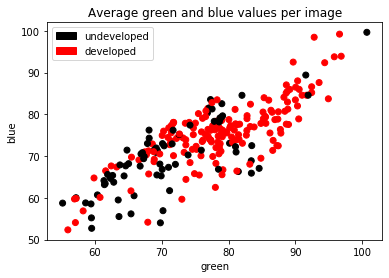

In [23]:
colormap = np.array(['black', 'red'])
plt.scatter(green, blue, c=colormap[development])
plt.xlabel('green')
plt.ylabel('blue')
developed = mpatches.Patch(color='black', label='undeveloped')
undeveloped = mpatches.Patch(color='red', label='developed')
plt.legend(handles=[developed,undeveloped])
plt.title("Average green and blue values per image")
plt.savefig('avg_gb_developed')
plt.show()

In [56]:
knn_developed = tagged.drop(['image_id', 'impact', 'ocean', 'terrain_inland', 'terrain_marsh', 'terrain_sandy_coastline', 'terrain_undefined', 'washover' ], axis= 1)
knn_impact = tagged.drop(['image_id', 'development', 'washover', 'ocean', 'terrain_inland', 'terrain_marsh', 'terrain_sandy_coastline', 'terrain_undefined', 'washover' ], axis= 1)

In [25]:
knn_general = tagged.drop('image_id', axis = 1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(knn_general, terrain_marsh, random_state=0)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn_general.shape


(248, 12)

In [61]:
print(knn.score(X_test, y_test))

0.8387096774193549


In [32]:
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, ypred)
print(confusion_matrix(y_test, ypred))

[[17  6]
 [ 9 30]]


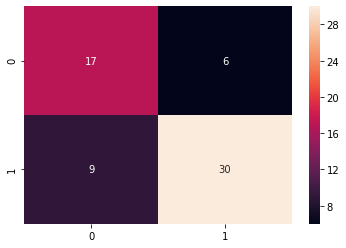

In [33]:

ax = seaborn.heatmap(cnf_matrix, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.figure.savefig('cfn_matrix.png')



neighbors 6 and 10 have the highest accuracy:

In [69]:
for n_neighbors in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    print(n_neighbors, knn.score(X_test, y_test))

1 0.9032258064516129
2 0.8709677419354839
3 0.8548387096774194
4 0.8709677419354839
5 0.8387096774193549
6 0.8870967741935484
7 0.8870967741935484
8 0.9032258064516129
9 0.9032258064516129
10 0.9032258064516129


resources:

https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/

http://zetcode.com/python/argparse/